#Summary of EDA Project
The Exploratory Data Analysis (EDA) project aims to uncover patterns, relationships, and insights in a given dataset using Python. The project involves loading, cleaning, and analyzing data using various visualizations and statistical techniques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
"""Load the dataset from a CSV file."""
data = pd.read_csv('sales_data_project.csv')
data

,ProductID,ProductName,Category,Region,Date,UnitsSold,Price,Discount,GrossSales,DiscountAmount,NetSales,COGS,Profit
0,427ac669,Car Beauty,Books,North America,2023-07-07,26,364.77,10,9484.02,948.40,8535.62,4226.83,4308.79
1,f4f7998a,School Furniture,Beauty,South America,2023-10-12,49,147.84,5,7244.16,362.21,6881.95,4242.19,2639.76
2,0c0f55a0,Science Clothing,Clothing,North America,2022-05-25,46,216.82,0,9973.72,0.00,9973.72,4904.26,5069.46
3,6ca9789e,Number Books,Electronics,North America,2024-06-26,23,427.41,0,9830.43,0.00,9830.43,5557.57,4272.86
4,2965a665,Resource Clothing,Furniture,Asia,2023-12-09,3,85.93,0,257.79,0.00,257.79,118.79,139.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2aeba7c9,Style Electronics,Clothing,Europe,2023-12-15,32,216.75,15,6936.00,1040.40,5895.60,3888.07,2007.53
9996,a4753d2f,Third Electronics,Clothing,Europe,2023-06-10,16,263.80,20,4220.80,844.16,3376.64,1453.66,1922.98
9997,96775f99,Give Clothing,Furniture,Australia,2023-02-19,7,471.31,0,3299.17,0.00,3299.17,2254.45,1044.72
9998,6507b85c,Without Clothing,Books,Australia,2021-12-18,3,112.39,0,337.17,0.00,337.17,178.50,158.67


In [3]:
# Basic dataset overview

def dataset_overview(data):
    """Print basic information about the dataset."""
    print("\n--- Dataset Overview ---")
    print(data.info())
    print("\n--- First Five Rows ---")
    print(data.head())
    print("\n--- Descriptive Statistics ---")
    print(data.describe())
    print("\n--- Missing Values ---")
    print(data.isnull().sum())
    print("\n--- Duplicates ---")
    print(f"Number of duplicate rows: {data.duplicated().sum()}")

In [4]:
dataset_overview(data)


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductID       10000 non-null  object 
 1   ProductName     10000 non-null  object 
 2   Category        10000 non-null  object 
 3   Region          10000 non-null  object 
 4   Date            10000 non-null  object 
 5   UnitsSold       10000 non-null  int64  
 6   Price           10000 non-null  float64
 7   Discount        10000 non-null  int64  
 8   GrossSales      10000 non-null  float64
 9   DiscountAmount  10000 non-null  float64
 10  NetSales        10000 non-null  float64
 11  COGS            10000 non-null  float64
 12  Profit          10000 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 1015.8+ KB
None

--- First Five Rows ---
  ProductID        ProductName     Category         Region        Date  \
0  427ac669         Ca

In [6]:
# Data cleaning
def clean_data(data):
    """Handle missing values and remove duplicates."""
    data = data.drop_duplicates()
    data = data.fillna(method='ffill')  # Forward fill as an example
    return data

In [7]:
clean_data(data)

C:\Users\Shree\AppData\Local\Temp\ipykernel_15336\1787788798.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill as an example


,ProductID,ProductName,Category,Region,Date,UnitsSold,Price,Discount,GrossSales,DiscountAmount,NetSales,COGS,Profit
0,427ac669,Car Beauty,Books,North America,2023-07-07,26,364.77,10,9484.02,948.40,8535.62,4226.83,4308.79
1,f4f7998a,School Furniture,Beauty,South America,2023-10-12,49,147.84,5,7244.16,362.21,6881.95,4242.19,2639.76
2,0c0f55a0,Science Clothing,Clothing,North America,2022-05-25,46,216.82,0,9973.72,0.00,9973.72,4904.26,5069.46
3,6ca9789e,Number Books,Electronics,North America,2024-06-26,23,427.41,0,9830.43,0.00,9830.43,5557.57,4272.86
4,2965a665,Resource Clothing,Furniture,Asia,2023-12-09,3,85.93,0,257.79,0.00,257.79,118.79,139.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2aeba7c9,Style Electronics,Clothing,Europe,2023-12-15,32,216.75,15,6936.00,1040.40,5895.60,3888.07,2007.53
9996,a4753d2f,Third Electronics,Clothing,Europe,2023-06-10,16,263.80,20,4220.80,844.16,3376.64,1453.66,1922.98
9997,96775f99,Give Clothing,Furniture,Australia,2023-02-19,7,471.31,0,3299.17,0.00,3299.17,2254.45,1044.72
9998,6507b85c,Without Clothing,Books,Australia,2021-12-18,3,112.39,0,337.17,0.00,337.17,178.50,158.67



--- Univariate Analysis ---

--- Univariate Analysis: UnitsSold ---


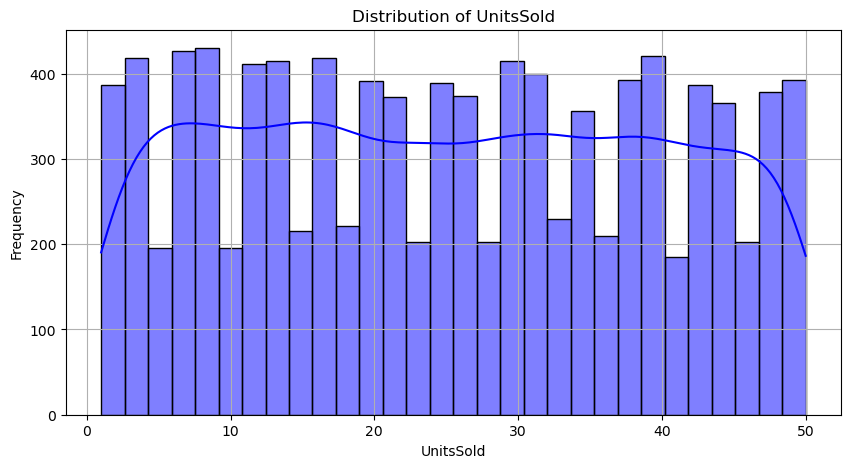


--- Univariate Analysis: Price ---


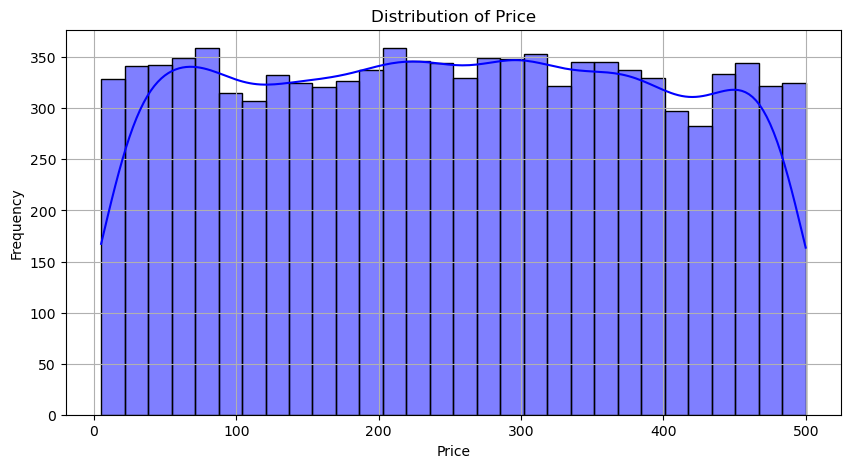


--- Univariate Analysis: Profit ---


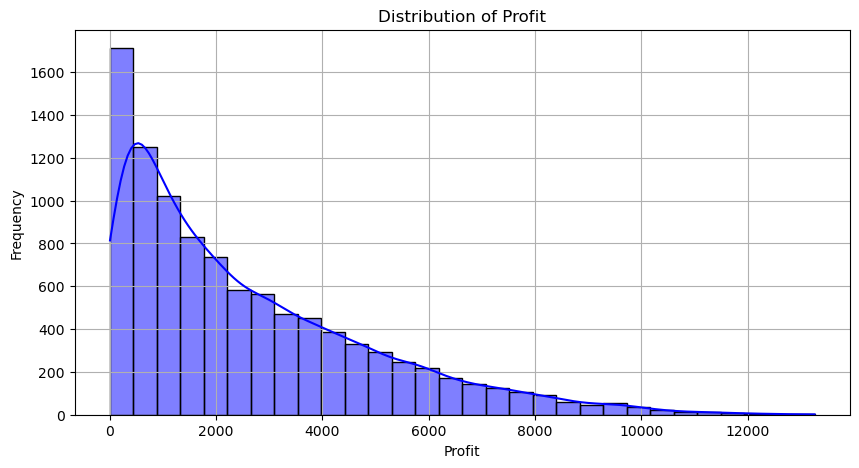


--- Univariate Analysis: Category ---


C:\Users\Shree\AppData\Local\Temp\ipykernel_15332\1580444390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


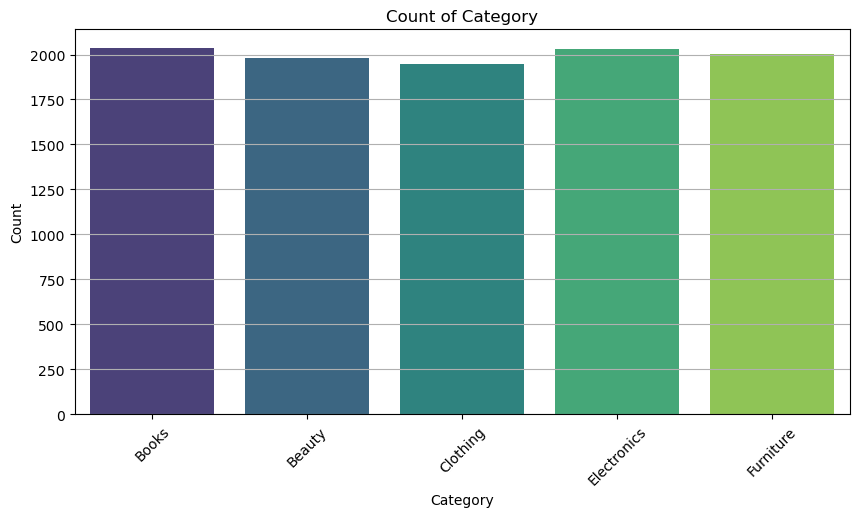


--- Univariate Analysis: Region ---


C:\Users\Shree\AppData\Local\Temp\ipykernel_15332\1580444390.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='viridis')


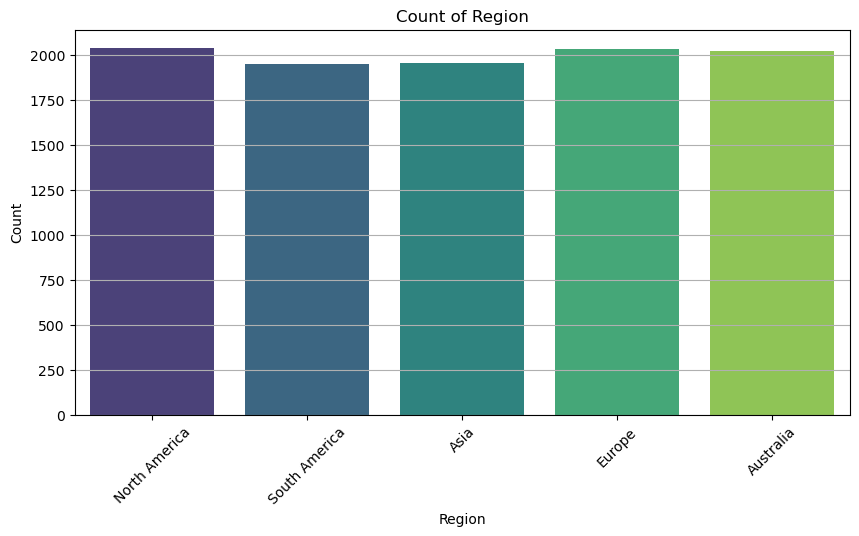

In [8]:
# Univariate Analysis
print("\n--- Univariate Analysis ---")
univariate_columns = ['UnitsSold', 'Price', 'Profit', 'Category', 'Region']
for column in univariate_columns:
    print(f"\n--- Univariate Analysis: {column} ---")
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[column], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()
    else:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=column, data=data, palette='viridis')
        plt.title(f"Count of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.grid(axis='y')
        plt.show()



--- Bivariate Analysis ---

--- Bivariate Analysis: UnitsSold vs Profit ---


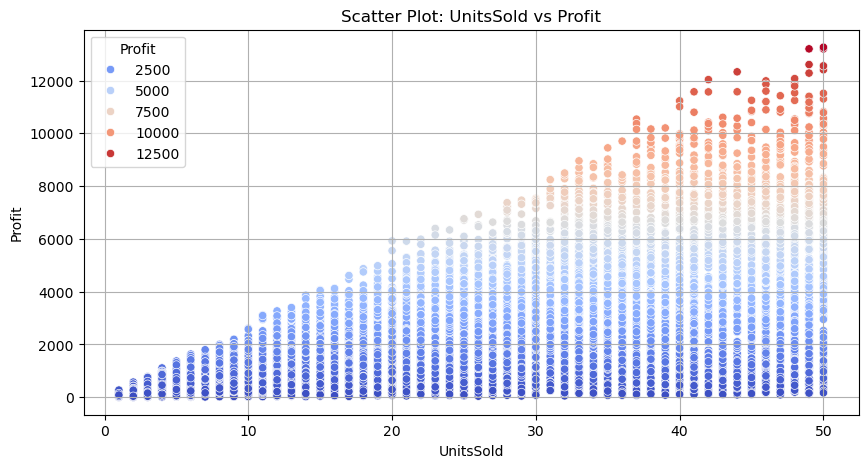


--- Bivariate Analysis: Price vs GrossSales ---


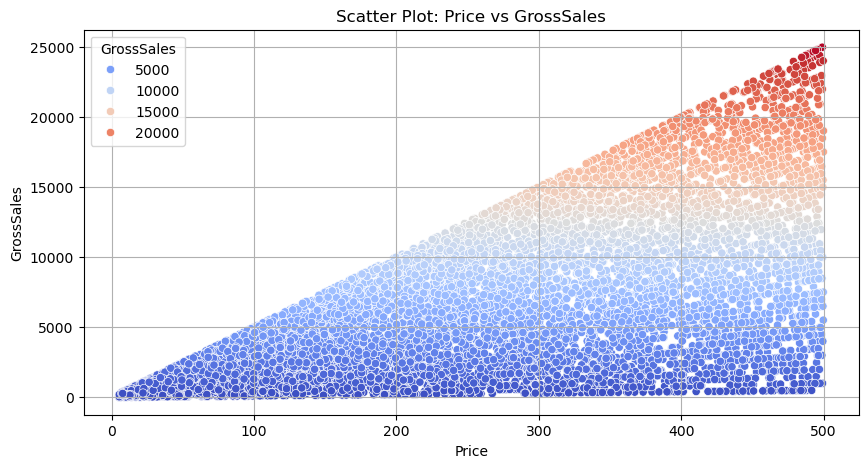


--- Bivariate Analysis: NetSales vs Profit ---


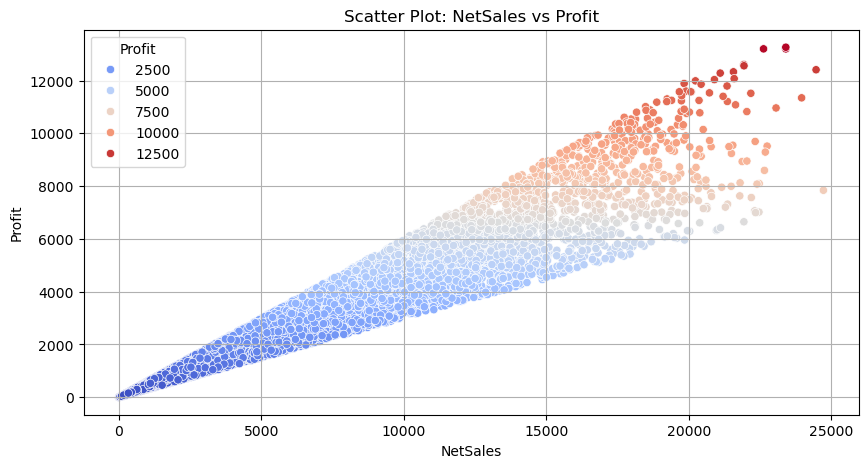


--- Bivariate Analysis: Category vs Profit ---


C:\Users\Shree\AppData\Local\Temp\ipykernel_15332\1758942645.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col1, y=col2, data=data, palette='viridis')


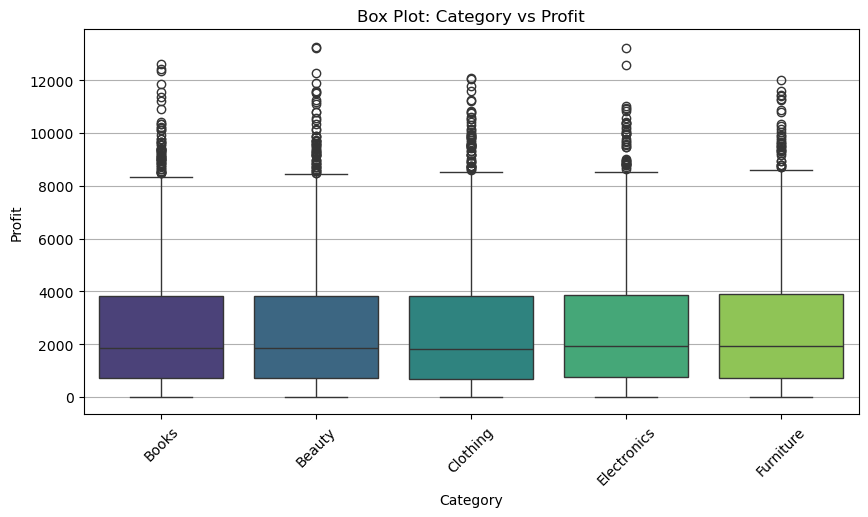


--- Bivariate Analysis: Region vs UnitsSold ---


C:\Users\Shree\AppData\Local\Temp\ipykernel_15332\1758942645.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col1, y=col2, data=data, palette='viridis')


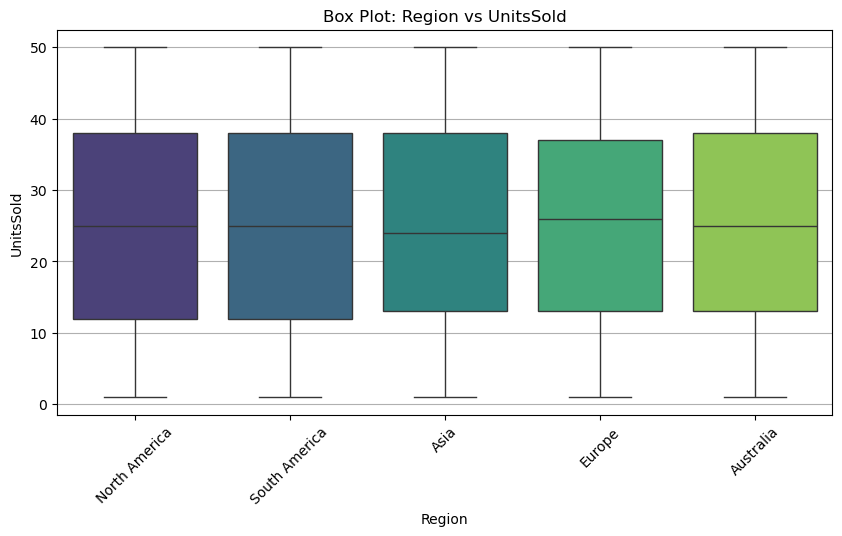

In [9]:
# Bivariate Analysis
print("\n--- Bivariate Analysis ---")
bivariate_pairs = [
    ('UnitsSold', 'Profit'),
    ('Price', 'GrossSales'),
    ('NetSales', 'Profit'),
    ('Category', 'Profit'),
    ('Region', 'UnitsSold'),
]
for col1, col2 in bivariate_pairs:
    print(f"\n--- Bivariate Analysis: {col1} vs {col2} ---")
    plt.figure(figsize=(10, 5))
    if data[col1].dtype in ['int64', 'float64'] and data[col2].dtype in ['int64', 'float64']:
        sns.scatterplot(x=col1, y=col2, data=data, hue=data[col2], palette='coolwarm')
        plt.title(f"Scatter Plot: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
    elif data[col1].dtype == 'object' and data[col2].dtype in ['int64', 'float64']:
        sns.boxplot(x=col1, y=col2, data=data, palette='viridis')
        plt.title(f"Box Plot: {col1} vs {col2}")
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.xticks(rotation=45)
        plt.grid(axis='y')
    plt.show()



--- Bar Chart Example ---


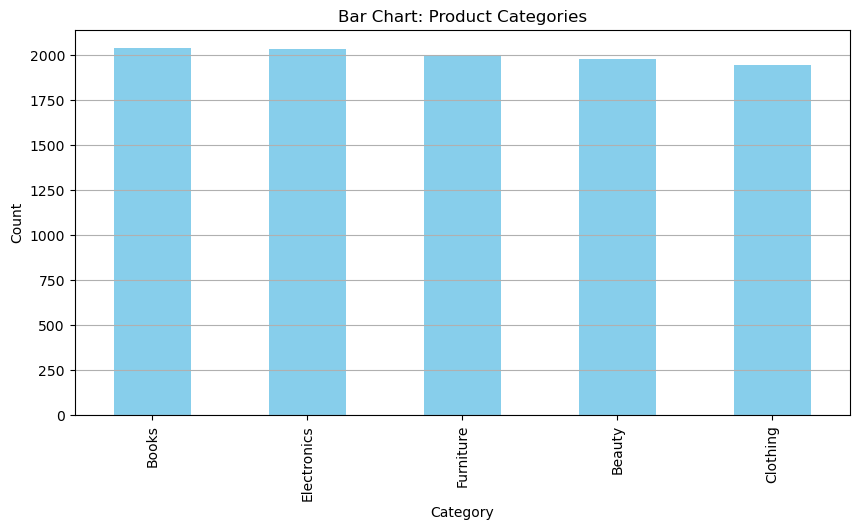

In [10]:
# Additional Analysis Examples
print("\n--- Bar Chart Example ---")
plt.figure(figsize=(10, 5))
data['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Bar Chart: Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()


--- Line Chart Example ---


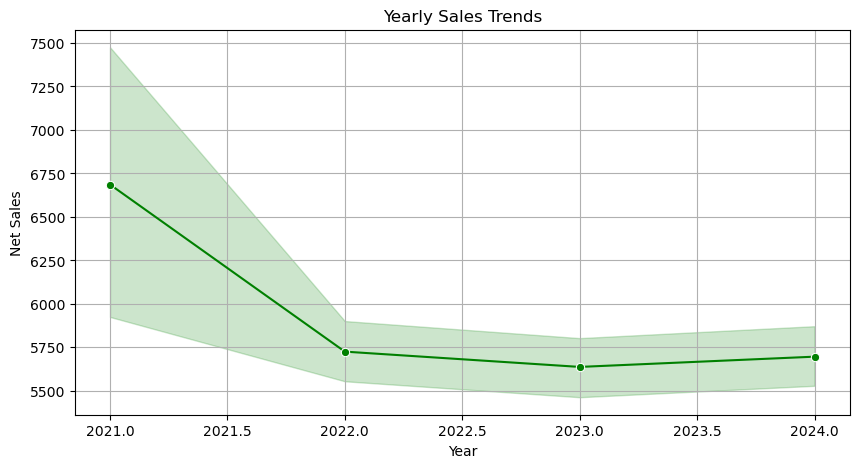

In [11]:
print("\n--- Line Chart Example ---")
data['Year'] = pd.to_datetime(data['Date']).dt.year  # Extract year
plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='NetSales', data=data, marker='o', color='green')
plt.title("Yearly Sales Trends")
plt.xlabel("Year")
plt.ylabel("Net Sales")
plt.grid(True)
plt.show()


--- Pie Chart Analysis ---


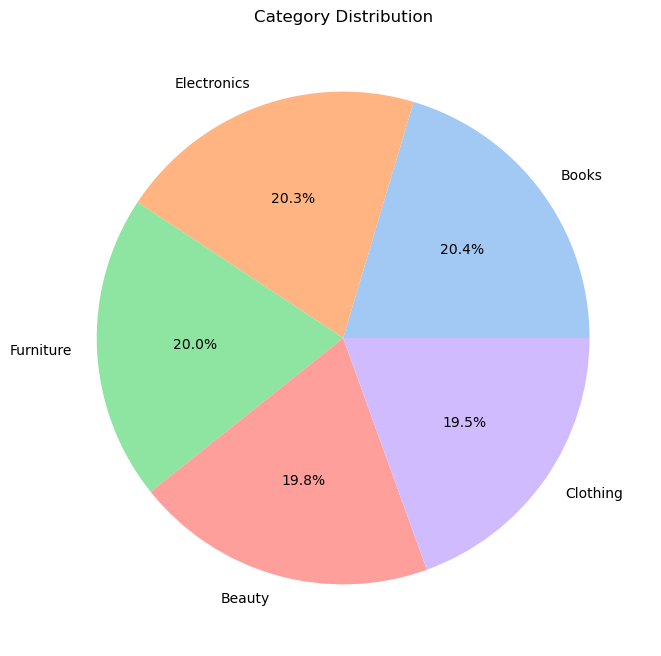

In [13]:
print("\n--- Pie Chart Analysis ---")
plt.figure(figsize=(8, 8))
data['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Category Distribution")
plt.ylabel("")  # Hide y-label for pie chart
plt.show()


--- Grouped Analysis ---
                NetSales      Profit
Category                            
Beauty       11131418.83  5077628.38
Books        11615375.90  5240559.44
Clothing     11061577.50  5000475.44
Electronics  11691388.97  5260891.08
Furniture    11541601.01  5158550.40


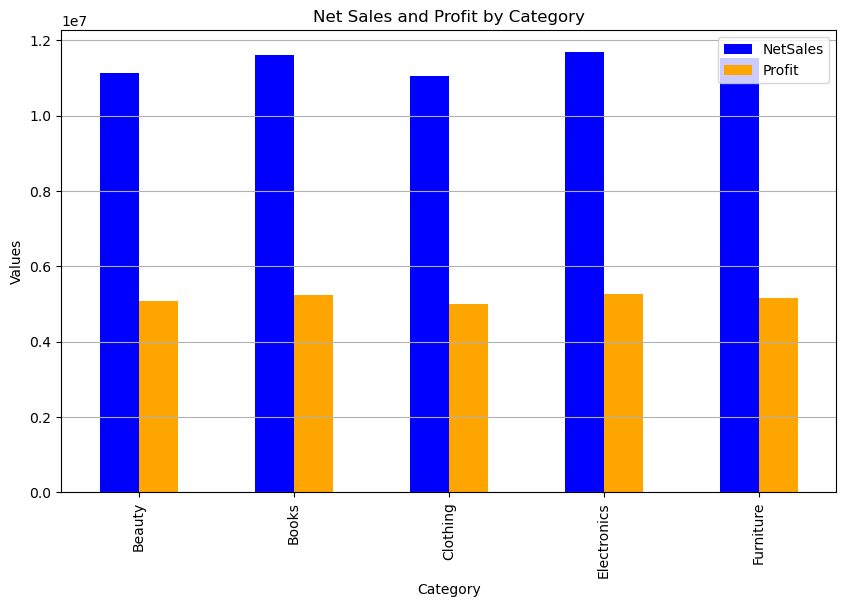

In [15]:
print("\n--- Grouped Analysis ---")
grouped_data = data.groupby('Category')[['NetSales', 'Profit']].sum()
print(grouped_data)
grouped_data.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title("Net Sales and Profit by Category")
plt.xlabel("Category")
plt.ylabel("Values")
plt.grid(axis='y')
plt.show()


--- Pivot Table Analysis ---
Category           Beauty       Books    Clothing  Electronics   Furniture
Region                                                                    
Asia           2018273.34  2343880.58  2017233.79   2489317.53  2058825.41
Australia      2201904.62  2293353.49  2125356.58   2378045.83  2594599.65
Europe         2462882.23  2360958.68  2508111.40   2182889.65  2146578.57
North America  2266114.08  2326999.54  2249595.93   2611377.24  2452399.24
South America  2182244.56  2290183.61  2161279.80   2029758.72  2289198.14


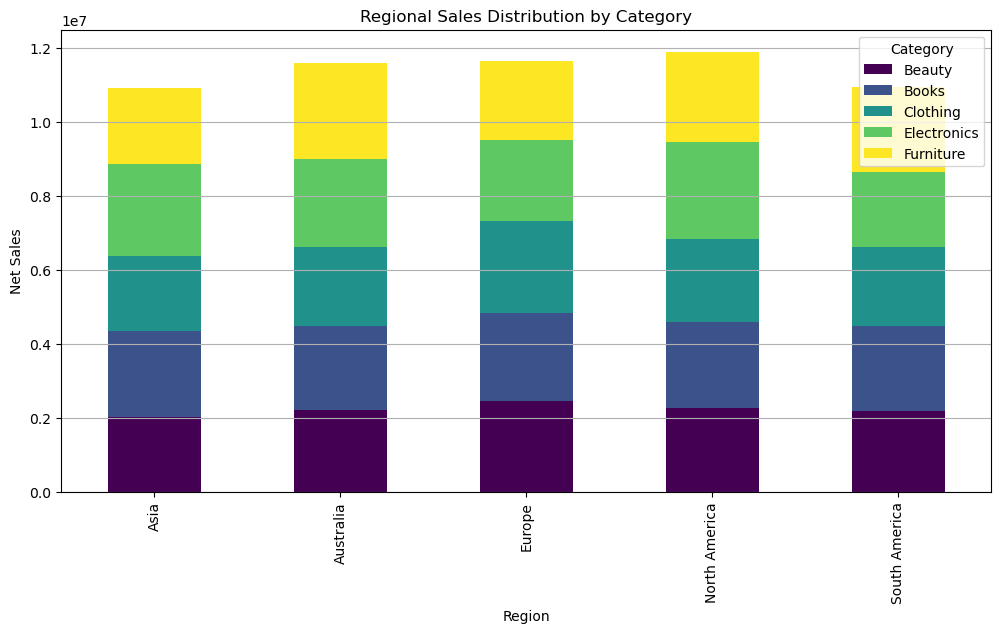

In [16]:
print("\n--- Pivot Table Analysis ---")
pivot_data = pd.pivot_table(data, values='NetSales', index='Region', columns='Category', aggfunc='sum')
print(pivot_data)
pivot_data.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='viridis')
plt.title("Regional Sales Distribution by Category")
plt.xlabel("Region")
plt.ylabel("Net Sales")
plt.legend(title="Category")
plt.grid(axis='y')
plt.show()

In [17]:
print("\n--- EDA Completed ---")


--- EDA Completed ---
